In [1]:
import pandas as pd

#preprocessing functions used in standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
f_path = "C:/Users/GBTC441002ur/Documents/Adv_DataAnalytics/datasets/DC_Properties.csv"

dcprop_df = pd.read_csv(f_path)
dcprop_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
#check if there's any missing value in the data
dcprop_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [4]:
dcprop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

In [5]:
#drop columns which are not important
dc_clean = dcprop_df.drop(['NATIONALGRID','ASSESSMENT_SUBNBHD','CENSUS_BLOCK',
                         'X','Y','QUADRANT','NUM_UNITS','STYLE','STRUCT','GRADE','CNDTN',
                         'EXTWALL','ROOF','INTWALL','KITCHENS','CMPLX_NUM','LIVING_GBA',
                         'FULLADDRESS','CITY','STATE','ZIPCODE','LATITUDE','LONGITUDE','SALEDATE',
                         'WARD','ASSESSMENT_NBHD','CENSUS_TRACT','GIS_LAST_MOD_DTTM','HEAT','AC','QUALIFIED',
                          'SOURCE','FULLADDRESS','CITY','STATE','NATIONALGRID','ASSESSMENT_NBHD','WARD',
                          'SQUARE'],axis=1)
dc_clean

,Unnamed: 0,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,FIREPLACES,USECODE,LANDAREA
0,0,4,0,8,4,1910.0,1988.0,1972,3.0,1095000.0,1,2522.0,1,5,24,1680
1,1,3,1,11,5,1898.0,2007.0,1972,3.0,NaN,1,2567.0,1,4,24,1680
2,2,3,1,9,5,1910.0,2009.0,1984,3.0,2100000.0,3,2522.0,1,4,24,1680
3,3,3,1,8,5,1900.0,2003.0,1984,3.0,1602000.0,1,2484.0,1,3,24,1680
4,4,2,1,11,3,1913.0,2012.0,1985,3.0,NaN,1,5255.0,1,0,13,2032
5,5,3,2,10,5,1913.0,NaN,1972,4.0,1950000.0,1,5344.0,1,4,11,2196
6,6,1,0,5,2,1917.0,1988.0,1957,2.0,NaN,1,1260.0,1,0,24,1261
7,7,3,1,8,4,1906.0,2011.0,1972,3.0,1050000.0,1,2401.0,1,1,24,1627
8,8,3,1,7,3,1908.0,2008.0,1967,2.0,1430000.0,4,1488.0,1,1,24,1424
9,9,1,1,6,2,1908.0,1979.0,1950,2.0,NaN,1,1590.0,1,0,11,1424


In [6]:
dc_clean.count()

Unnamed: 0    158957
BATHRM        158957
HF_BATHRM     158957
ROOMS         158957
BEDRM         158957
AYB           158686
YR_RMDL        80928
EYB           158957
STORIES       106652
PRICE          98216
SALE_NUM      158957
GBA           106696
BLDG_NUM      158957
FIREPLACES    158957
USECODE       158957
LANDAREA      158957
dtype: int64

In [7]:
dc_clean1 = dc_clean[['BATHRM','BEDRM','ROOMS','PRICE']]

In [8]:
dc_clean1.head()

,BATHRM,BEDRM,ROOMS,PRICE
0,4,4,8,1095000.0
1,3,5,11,NaN
2,3,5,9,2100000.0
3,3,5,8,1602000.0
4,2,3,11,NaN


In [9]:
#replace missing value from each column with the average of the eintire column
#replace missing value wih 0 does not work
dc_clean["YR_RMDL"].fillna(dc_clean["YR_RMDL"].mean(), inplace=True)
dc_clean["PRICE"].fillna(dc_clean["PRICE"].mean(), inplace=True)
dc_clean["STORIES"].fillna(dc_clean["STORIES"].mean(), inplace=True)
dc_clean["GBA"].fillna(dc_clean["GBA"].mean(), inplace=True)


In [10]:
#check the total number of price column
dc_clean.count()

Unnamed: 0    158957
BATHRM        158957
HF_BATHRM     158957
ROOMS         158957
BEDRM         158957
AYB           158686
YR_RMDL       158957
EYB           158957
STORIES       158957
PRICE         158957
SALE_NUM      158957
GBA           158957
BLDG_NUM      158957
FIREPLACES    158957
USECODE       158957
LANDAREA      158957
dtype: int64

In [11]:
#descriptive statistics
dc_clean.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,FIREPLACES,USECODE,LANDAREA
count,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158686.000000,158957.000000,158957.000000,158957.000000,1.589570e+05,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000
mean,79478.000000,1.810678,0.458237,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,9.313516e+05,1.680033,1714.539889,1.000598,2.374674,14.252999,2473.282158
std,45887.077707,0.976396,0.587571,2.618165,1.358864,33.640234,11.827212,24.923150,2.402724,5.550558e+06,1.285898,721.523781,0.031622,737.295595,3.725736,5059.046023
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000
25%,39739.000000,1.000000,0.000000,4.000000,2.000000,1918.000000,1998.243537,1954.000000,2.000000,3.390000e+05,1.000000,1332.000000,1.000000,0.000000,11.000000,697.000000
50%,79478.000000,2.000000,0.000000,6.000000,3.000000,1937.000000,1998.243537,1963.000000,2.000000,7.475000e+05,1.000000,1714.539889,1.000000,0.000000,13.000000,1649.000000
75%,119217.000000,2.000000,1.000000,7.000000,3.000000,1960.000000,2004.000000,1975.000000,2.091793,9.313516e+05,2.000000,1714.539889,1.000000,1.000000,17.000000,3000.000000
max,158956.000000,14.000000,11.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,15.000000,45384.000000,5.000000,293920.000000,117.000000,942632.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DA91F4588>,
      dtype=object)

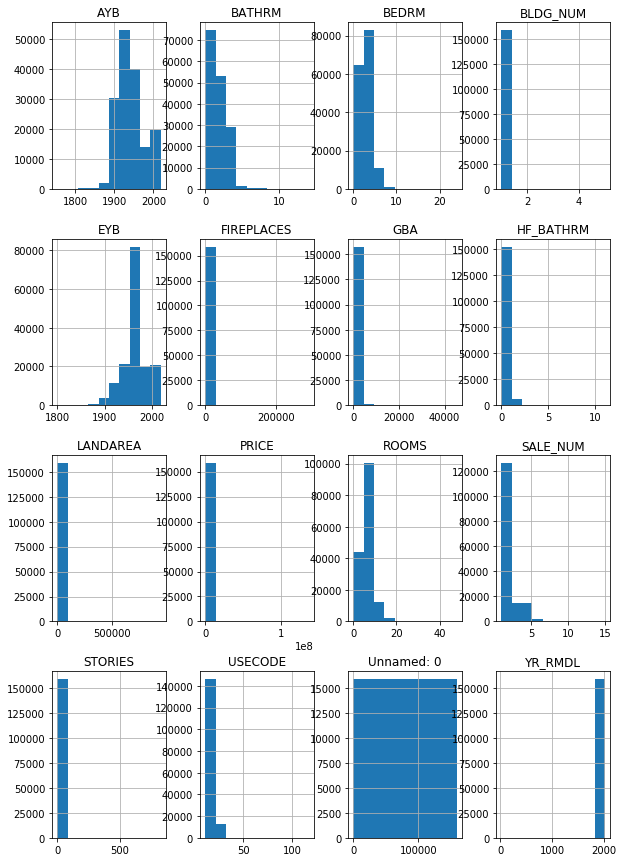

In [12]:
dc_clean.hist(figsize=(10,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DA91F4518>,
      dtype=object)

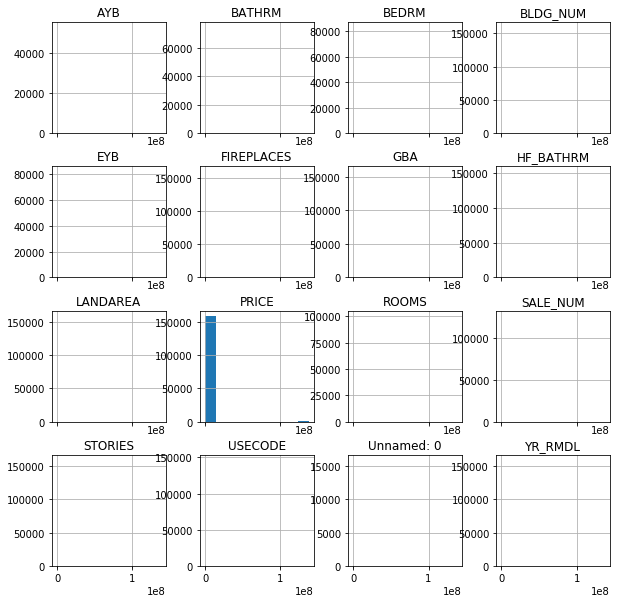

In [13]:
dc_clean.hist(figsize=(10,10),sharex=True)

In [14]:
scaler = StandardScaler()
price_zscore = scaler.fit_transform(dc_clean[['PRICE']])

In [15]:
#mean and standard deviation of z-score standardized 'PRICE' column
price_zscore.mean(), price_zscore.std()

(2.6641385438390238e-17, 1.0000000000000002)

In [16]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
price_zcol = pd.Series(price_zscore.reshape(-1))

In [17]:
#first 5 rows of z-score standardized price column
price_zcol.head()

0    2.948333e-02
1    2.097369e-17
2    2.105468e-01
3    1.208258e-01
4    2.097369e-17
dtype: float64

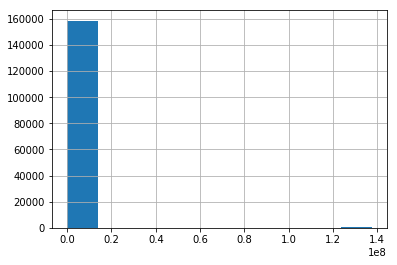

In [18]:
#BEFORE: frequency count plot of 'Price' column
dc_clean['PRICE'].hist()

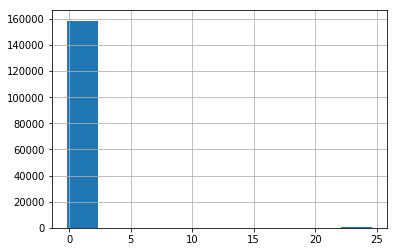

In [19]:
price_zcol.hist()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DAF6ABA90>,
      dtype=object)

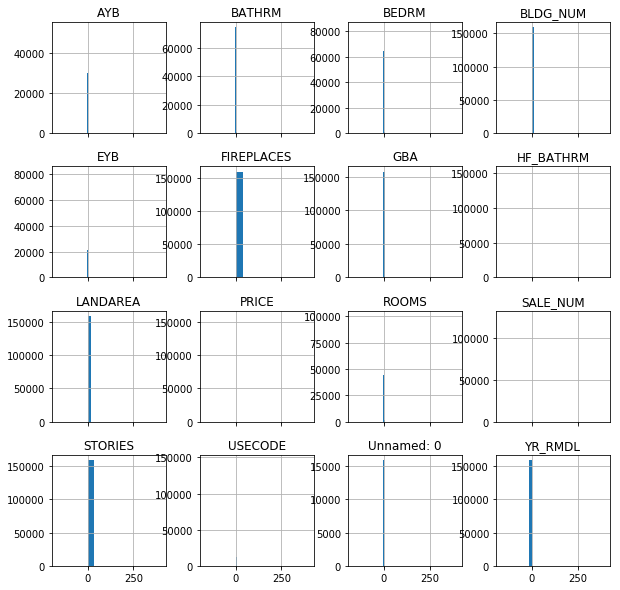

In [20]:
#show z-score standardization for all columns

#list to hold column names
colnames = list(dc_clean.columns)

#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(dc_clean), columns = colnames)

#plot frequency distribution with same scale range
zscore_df.hist(figsize=(10,10), sharex=True)


In [21]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()


In [25]:
dc_clean1.count()

BATHRM    158957
BEDRM     158957
ROOMS     158957
PRICE     158957
dtype: int64

In [24]:
dc_clean1["PRICE"].fillna(dc_clean1["PRICE"].mean(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [26]:
dc_clean1.head()

,BATHRM,BEDRM,ROOMS,PRICE
0,4,4,8,1.095000e+06
1,3,5,11,9.313516e+05
2,3,5,9,2.100000e+06
3,3,5,8,1.602000e+06
4,2,3,11,9.313516e+05


In [27]:
dc_clean1['PRICE']

0         1.095000e+06
1         9.313516e+05
2         2.100000e+06
3         1.602000e+06
4         9.313516e+05
5         1.950000e+06
6         9.313516e+05
7         1.050000e+06
8         1.430000e+06
9         9.313516e+05
10        9.313516e+05
11        9.313516e+05
12        9.313516e+05
13        9.313516e+05
14        1.325000e+06
15        9.313516e+05
16        1.240000e+06
17        9.313516e+05
18        9.313516e+05
19        5.922500e+05
20        3.323200e+04
21        9.313516e+05
22        9.074000e+05
23        1.065000e+06
24        1.100000e+06
25        2.000000e+04
26        9.313516e+05
27        7.037000e+05
28        9.313516e+05
29        1.210000e+06
              ...     
158927    9.313516e+05
158928    6.324000e+05
158929    5.740000e+05
158930    3.650000e+05
158931    4.050000e+05
158932    5.050000e+05
158933    5.200000e+05
158934    4.999000e+05
158935    4.510000e+05
158936    5.649000e+05
158937    9.313516e+05
158938    6.600000e+05
158939    3

In [28]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
price_minmax = minmax_sc.fit_transform(dc_clean1[['PRICE']])

In [29]:
#mean and standard deviation of Min-Max 'Glucose' column
price_minmax.mean(), price_minmax.std()

(0.0067770300467104, 0.04038885061696727)

In [30]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
price_mm_col = pd.Series(price_minmax.reshape(-1))
price_mm_col

0         0.007968
1         0.006777
2         0.015281
3         0.011657
4         0.006777
5         0.014189
6         0.006777
7         0.007640
8         0.010405
9         0.006777
10        0.006777
11        0.006777
12        0.006777
13        0.006777
14        0.009641
15        0.006777
16        0.009023
17        0.006777
18        0.006777
19        0.004310
20        0.000242
21        0.006777
22        0.006603
23        0.007750
24        0.008004
25        0.000146
26        0.006777
27        0.005121
28        0.006777
29        0.008805
            ...   
158927    0.006777
158928    0.004602
158929    0.004177
158930    0.002656
158931    0.002947
158932    0.003675
158933    0.003784
158934    0.003638
158935    0.003282
158936    0.004111
158937    0.006777
158938    0.004803
158939    0.002765
158940    0.006777
158941    0.006777
158942    0.006777
158943    0.003922
158944    0.006611
158945    0.003274
158946    0.003532
158947    0.002328
158948    0.

In [31]:
#verify the range is between 0 and 1
price_mm_col.min(), price_mm_col.max()

(0.0, 0.9999999999999999)

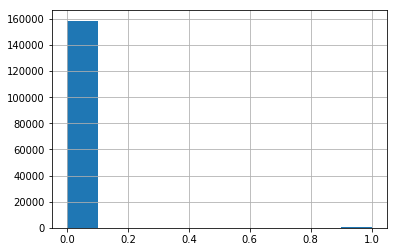

In [32]:
price_mm_col.hist()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DB01CD2E8>,
      dtype=object)

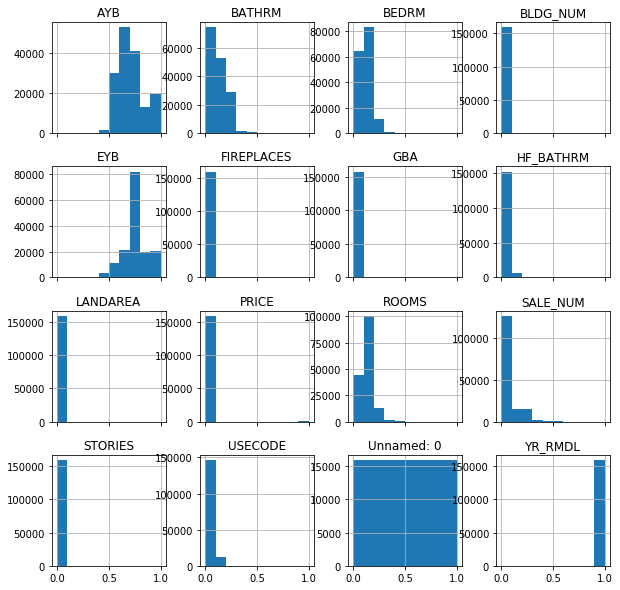

In [35]:
#show min-max scaling for all columns

#calculate min-max
#minmax_df = pd.DataFrame(minmax_sc.fit_transform(dc_clean1), columns = colnames)
minmax_df = pd.DataFrame(minmax_sc.fit_transform(dc_clean), columns = colnames)

#plot frequency distribution with same scale range
#minmax_df.hist(figsize=(10,10),sharex=True)
minmax_df.hist(figsize=(10,10), sharex=True)
